In [1]:
import pandas as pd
import datetime
from datetime import timedelta, date
import numpy as np

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

# Citation for Data set 
# Johns Hopkins University. (2020). JHU CSSE COVID-19 Data [Data file]. Retrieved from https://github.com/CSSEGISandData/COVID-19

url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
# Data for the US States available from 4-12-2020 at this new location
# Also includes testing data
url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'

us_states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming',
    'AS': 'American Samoa',
    'GU': 'Guam',
    'MP': 'Northern Mariana Islands',
    'PR': 'Puerto Rico',
    'VI': 'Virgin Islands'
}

us_states_abbrev = dict(map(reversed, us_states.items()))

us_states_fips_codes = {
    'AL': '01',
    'AK': '02',
    'AZ': '04',
    'AR': '05',
    'CA': '06',
    'CO': '08',
    'CT': '09',
    'DE': '10',
    'DC': '11',
    'FL': '12',
    'GA': '13',
    'HI': '15',
    'ID': '16',
    'IL': '17',
    'IN': '18',
    'IA': '19',
    'KS': '20',
    'KY': '21',
    'LA': '22',
    'ME': '23',
    'MD': '24',
    'MA': '25',
    'MI': '26',
    'MN': '27',
    'MS': '28',
    'MO': '29',
    'MT': '30',
    'NE': '31',
    'NV': '32',
    'NH': '33',
    'NJ': '34',
    'NM': '35',
    'NY': '36',
    'NC': '37',
    'ND': '38',
    'OH': '39',
    'OK': '40',
    'OR': '41',
    'PA': '42',
    'RI': '44',
    'SC': '45',
    'SD': '46',
    'TN': '47',
    'TX': '48',
    'UT': '49',
    'VT': '50',
    'VA': '51',
    'WA': '53',
    'WV': '54',
    'WI': '55',
    'WY': '56',
    'AS': '60',
    'GU': '66',
    'MP': '69',
    'PR': '72',
    'VI': '78'
}

COL_NAMES_1 = ['State', 'Country', 'UpdateDate', 'Confirmed', 'Deaths', 'Recovered']
COL_NAMES_2 = ['State', 'Country', 'UpdateDate', 'Confirmed', 'Deaths', 'Recovered',
               'Latitude', 'Longitude']
COL_NAMES_3 = ['FIPS', 'Admin2', 'State', 'Country', 'UpdateDate', 'Latitude', 'Longitude', 
               'Confirmed', 'Deaths', 'Recovered', 'Active', 'Combined_Key']

# Data for the US States available from 4-12-2020 at a new URL
# Also includes testing data
COL_NAMES_4 = ['State', 'Country', 'UpdateDate', 'Latitude', 'Longitude', 
               'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS',
               'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID',
               'ISO3', 'Testing_Rate', 'Hospitalization_Rate']

NEW_URL_DATE = date(2020, 4, 12)

DATAFRAME_START_DATE = date(2020, 2, 1)
STATE_NAME_START_DATE = date(2020, 3, 10)
COL_NAMES_1_END_DATE = date(2020, 3, 1)
COL_NAMES_2_END_DATE = date(2020, 3, 22)
COL_NAMES_3_END_DATE = date(2020, 4, 12)

FILENAME_DATE_FORMAT = "%m-%d-%Y"
FILENAME_EXTENSION = ".csv"

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

def read_file_to_df(single_date, df):

    url = url_1 if (single_date < NEW_URL_DATE) else url_2
    
    assert(single_date >= DATAFRAME_START_DATE and single_date <= datetime.date.today())
    if (single_date >= DATAFRAME_START_DATE and single_date < COL_NAMES_1_END_DATE):
        column_names = COL_NAMES_1
        col_types = {}
    elif (single_date >= COL_NAMES_1_END_DATE and single_date < COL_NAMES_2_END_DATE):
        column_names = COL_NAMES_2
        col_types = {}
    elif (single_date >= COL_NAMES_2_END_DATE and single_date < COL_NAMES_3_END_DATE):
        column_names = COL_NAMES_3
        col_types = {'FIPS': str}
    else:
        column_names = COL_NAMES_4
        col_types = {'FIPS': str}
    
    try:
        file_name = url + single_date.strftime(FILENAME_DATE_FORMAT) + FILENAME_EXTENSION
        print(file_name)

        df1 = pd.read_csv(file_name, header=0, names=column_names, dtype=col_types)

        # Save the report date 
        df1['Date'] = single_date

        # Make sure the numeric fields have the correct type
        df1[['Confirmed', 'Deaths', 'Recovered']] = df1[['Confirmed', 'Deaths', 'Recovered']].apply(pd.to_numeric, errors='coerce')
        if (single_date >= COL_NAMES_2_END_DATE):
            #df1[['Active', 'FIPS']] = df1[['Active', 'FIPS']].apply(pd.to_numeric, errors='coerce')
            df1[['Active']] = df1[['Active']].apply(pd.to_numeric, errors='coerce')
        if (single_date >= COL_NAMES_3_END_DATE):
            df1[['Incident_Rate', 'People_Tested', 'People_Hospitalized']] = df1[['Incident_Rate', 'People_Tested', 'People_Hospitalized']].apply(pd.to_numeric, errors='coerce')
            df1[['Mortality_Rate', 'Testing_Rate', 'Hospitalization_Rate']] = df1[['Mortality_Rate', 'Testing_Rate', 'Hospitalization_Rate']].apply(pd.to_numeric, errors='coerce')

        # Filter out US data if we are getting worldwide statistics from the old URL
        if (single_date < COL_NAMES_3_END_DATE):
            df1 = df1.loc[df1['Country'] == 'US']

        # More robust method would be to check if the column exists in the list of dataframe column names
        # Taking a more efficient approach
        if ('Country' in column_names):
            del df1['Country']
        if ('Admin2' in column_names):
            del df1['Admin2']
        if ('Combined_Key' in column_names):
            del df1['Combined_Key']
        if ('UID' in column_names):
            del df1['UID']
        if ('ISO3' in column_names):
            del df1['ISO3']
        if ('UpdateDate' in column_names):
            del df1['UpdateDate']

        # Older files have multiple records for each state. Summarize the counts for each state.
        if (single_date < COL_NAMES_2_END_DATE):
            # Washington, D.C. needs to be stored as DC
            df1['State'] = df1['State'].str.replace('D.C.', 'DC')
            # We need to extract the state code and provide summary information for the state
            if (single_date < STATE_NAME_START_DATE):
                city_state = df1['State'].str.split(', ', expand = True)
                # Some of the state codes have cruise ship names appended so we need to strip those
                df1['State'] = city_state[1].str[:2]

            df1 = df1.groupby(['State', 'Date']).agg(
                Confirmed = ('Confirmed', 'sum'),
                Deaths = ('Deaths', 'sum'),
                Recovered = ('Recovered', 'sum'))
            df1['Active'] = df1['Confirmed'] - df1['Deaths'] - df1['Recovered']
        elif (single_date >= COL_NAMES_2_END_DATE and single_date < COL_NAMES_3_END_DATE):
            df1 = df1.groupby(['State', 'Date']).agg(
                Confirmed = ('Confirmed', 'sum'),
                Deaths = ('Deaths', 'sum'),
                Recovered = ('Recovered', 'sum'),
                Active = ('Active', 'sum'))

        df1.reset_index(inplace=True)

        # We will eventually use the FIPS code to represent each state
        # First convert state names to the corresponding 2-letter code
        if (single_date >= STATE_NAME_START_DATE):
            df1['State'].replace(us_states_abbrev, inplace=True)

        if (single_date < COL_NAMES_3_END_DATE):
            df1['FIPS'] = df1['State'].map(us_states_fips_codes)

        df1['FIPS'] = df1['FIPS'].str.pad(width=2, side='left', fillchar='0')

        print("After FIPS padding...")
        print(df1.head())

    except Exception as e:
        print(str(e))
        
    else:
        df = df.append(df1)
        
    return df

start_date = DATAFRAME_START_DATE
end_date = datetime.date.today()
# Random start and end dates for testing only
#start_date = date(2020, 4, 12)
#end_date = date(2020, 4, 13)

df = pd.DataFrame()

# Read COVID-19 daily reports for US states and append them to the dataframe df
for single_date in daterange(start_date, end_date):
    df = read_file_to_df(single_date, df)
 
if  ('index' in list(df.columns.values)):
    del df['index']

df.reset_index(inplace=True, drop=True)

# Remove all rows for which the fips codes are not in our dictionary 
L = list(us_states_fips_codes.values())
df['FIPS1'] = df['FIPS'].str.extract('(' + '|'.join(L) + ')', expand=False).replace(us_states_fips_codes)
df = df.dropna(subset=['FIPS1'])
del df['FIPS1']

# Initialize latitude and longitude values for rows that do not have them 
# First create a dictionary with latitude values for each state and then use it to initialize the dataframe
# Ditto for longitude 
# There might be a better way
dfLatitude = df.groupby(['State']).agg({'Latitude': np.min})
dfLongitude = df.groupby(['State']).agg({'Longitude': np.min})
dictLatitudeLong = dfLatitude.to_dict()
dictLongitudeLong = dfLongitude.to_dict()
dictLatitude = dictLatitudeLong['Latitude']
dictLongitude = dictLongitudeLong['Longitude']

df['Latitude'] = df['State'].map(dictLatitude)
df['Longitude'] = df['State'].map(dictLongitude)
del df['State']

print("Dataframe with data for all dates and states")
print(df.head())

df.fillna(0, inplace=True)
print("Printing null columns")
print(df.columns[df.isnull().any()].tolist())

# Compute and add 'New_Cases' field
df.sort_values(by=['FIPS', 'Date'], inplace=True)

df['Prev_FIPS'] = df['FIPS'].shift(periods=1)
df['Prev_Confirmed'] = df['Confirmed'].shift(periods=1)
df['New_Cases_1'] = (df['Confirmed']-df['Prev_Confirmed']).where(df['FIPS'] == df['Prev_FIPS'])
df['New_Cases_2'] = (df['Confirmed']).where(df['FIPS'] != df['Prev_FIPS'])
df["New_Cases"] = df["New_Cases_1"].fillna(df["New_Cases_2"])
df.drop(['Prev_FIPS', 'Prev_Confirmed', 'New_Cases_1', 'New_Cases_2'], axis=1, inplace=True)

# https://datascience.stackexchange.com/questions/13567/ways-to-deal-with-longitude-latitude-feature
# Lat long coordinates have a problem that they are 2 features that represent a three dimensional space. 
# This means that the long coordinate goes all around, which means the two most extreme values are actually very close together. 
# What I do in this case is map them to x, y and z coordinates. 
# This means close points in these 3 dimensions are also close in reality. 
# Depending on the use case you can disregard the changes in height and map them to a perfect sphere. 
# These features can then be standardized properly.
df['x'] = np.cos(df['Latitude']) * np.cos(df['Longitude'])
df['y'] = np.cos(df['Latitude']) * np.sin(df['Longitude'])
df['z'] = np.sin(df['Latitude']) 
df.drop(['Latitude', 'Longitude'], axis=1, inplace=True)
print("Converted latitude and longitude...")
print(df.head())

# Confirmed = Deaths + Recovered + Active
# About a fifth of all rows (for all states) do not satisfy the above criterion
# So, we will keep the Confirmed field for now.
# Ideally, if one feature is a linear combination of the others, we would like to delete it 

df.set_index(['FIPS', 'x', 'y', 'z', 'Date'],inplace=True)
df_changes = df.pct_change()
df.reset_index(inplace=True)
df_changes.replace([np.inf, -np.inf], np.nan, inplace=True)
df_changes.fillna(0, inplace=True)
df_changes.reset_index(inplace=True)
print("Created dataframe with percentage change...")
print(df_changes.head())


https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-01-2020.csv
After FIPS padding...
  State        Date  Confirmed  Deaths  Recovered  Active FIPS
0    AZ  2020-02-01          1       0          0       1   04
1    CA  2020-02-01          3       0          0       3   06
2    IL  2020-02-01          2       0          0       2   17
3    MA  2020-02-01          1       0          0       1   25
4    WA  2020-02-01          1       0          0       1   53
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-02-2020.csv
After FIPS padding...
  State        Date  Confirmed  Deaths  Recovered  Active FIPS
0    AZ  2020-02-02          1       0          0       1   04
1    CA  2020-02-02          3       0          0       3   06
2    IL  2020-02-02          2       0          0       2   17
3    MA  2020-02-02          1       0          0       1   25
4    WA  

After FIPS padding...
  State        Date  Confirmed  Deaths  Recovered  Active FIPS
0    AZ  2020-02-17          1       0          0       1   04
1    CA  2020-02-17          8       0          0       8   06
2    IL  2020-02-17          2       0          2       0   17
3    MA  2020-02-17          1       0          0       1   25
4    TX  2020-02-17          1       0          0       1   48
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-18-2020.csv
After FIPS padding...
  State        Date  Confirmed  Deaths  Recovered  Active FIPS
0    AZ  2020-02-18          1       0          0       1   04
1    CA  2020-02-18          8       0          0       8   06
2    IL  2020-02-18          2       0          2       0   17
3    MA  2020-02-18          1       0          0       1   25
4    TX  2020-02-18          1       0          0       1   48
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_cov

After FIPS padding...
  State        Date  Confirmed  Deaths  Recovered  Active FIPS
0    AZ  2020-03-05          2       0          1       1   04
1    CA  2020-03-05         51       1          2      48   06
2    FL  2020-03-05          4       0          0       4   12
3    GA  2020-03-05          2       0          0       2   13
4    IL  2020-03-05          5       0          2       3   17
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-06-2020.csv
After FIPS padding...
  State        Date  Confirmed  Deaths  Recovered  Active FIPS
0    AZ  2020-03-06          3       0          1       2   04
1    CA  2020-03-06         59       1          2      56   06
2    CO  2020-03-06          4       0          0       4   08
3    FL  2020-03-06          4       0          0       4   12
4    GA  2020-03-06          3       0          0       3   13
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_cov

After FIPS padding...
  State        Date  Confirmed  Deaths  Recovered  Active FIPS
0    AL  2020-03-21        131       0          0     131   01
1    AK  2020-03-21         15       0          0      15   02
2    AZ  2020-03-21        118       1          0     117   04
3    AR  2020-03-21        122       0          0     122   05
4    CA  2020-03-21       1364      24          0    1340   06
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-22-2020.csv
After FIPS padding...
  State        Date  Confirmed  Deaths  Recovered  Active FIPS
0    AL  2020-03-22        157       0          0       0   01
1    AK  2020-03-22         20       0          0       0   02
2    AS  2020-03-22          0       0          0       0   60
3    AZ  2020-03-22        152       2          0       0   04
4    AR  2020-03-22        165       0          0       0   05
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_cov

After FIPS padding...
  State        Date  Confirmed  Deaths  Recovered  Active FIPS
0    AL  2020-04-06       1952      49          0       0   01
1    AK  2020-04-06        190       6          0       0   02
2    AZ  2020-04-06       2732      65          0       0   04
3    AR  2020-04-06        875      16          0       0   05
4    CA  2020-04-06      16019     380          0       0   06
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-07-2020.csv
After FIPS padding...
  State        Date  Confirmed  Deaths  Recovered  Active FIPS
0    AL  2020-04-07       2169      64          0       0   01
1    AK  2020-04-07        213       6          0       0   02
2    AZ  2020-04-07       2870      73          0       0   04
3    AR  2020-04-07        946      18          0       0   05
4    CA  2020-04-07      17351     432          0       0   06
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_cov

After FIPS padding...
   index State  Latitude  Longitude  Confirmed  Deaths  Recovered  Active  \
0      0    AL   32.3182   -86.9023       4345     133        NaN  4212.0   
1      1    AK   61.3707  -152.4044        300       9      110.0   291.0   
2      2    AS  -14.2710  -170.1320          0       0        NaN     NaN   
3      3    AZ   33.7298  -111.4312       4237     150      460.0  4087.0   
4      4    AR   34.9697   -92.3731       1620      37      548.0  1583.0   

  FIPS  Incident_Rate  People_Tested  People_Hospitalized  Mortality_Rate  \
0   01      92.665716        36391.0                553.0        3.060990   
1   02      50.188290         8735.0                 35.0        3.000000   
2   60       0.000000            3.0                  NaN             NaN   
3   04      58.210808        47398.0                578.0        3.540241   
4   05      62.571769        22675.0                 85.0        2.283951   

   Testing_Rate  Hospitalization_Rate        Date  


After FIPS padding...
   index State  Latitude  Longitude  Confirmed  Deaths  Recovered  Active  \
0      0    AL   32.3182   -86.9023       5593     196        NaN  5397.0   
1      1    AK   61.3707  -152.4044        335       9      196.0   326.0   
2      2    AS  -14.2710  -170.1320          0       0        NaN     NaN   
3      3    AZ   33.7298  -111.4312       5473     231     1265.0  5242.0   
4      4    AR   34.9697   -92.3731       2276      42      863.0  2234.0   

  FIPS  Incident_Rate  People_Tested  People_Hospitalized  Mortality_Rate  \
0   01     119.281784        48760.0                730.0        3.504380   
1   02      56.043590        12159.0                 39.0        2.686567   
2   60       0.000000            3.0                  NaN             NaN   
3   04      75.191823        56601.0                664.0        4.220720   
4   05      87.909473        29713.0                291.0        1.845343   

   Testing_Rate  Hospitalization_Rate        Date  


After FIPS padding...
   index State  Latitude  Longitude  Confirmed  Deaths  Recovered  Active  \
0      0    AL   32.3182   -86.9023       6750     242        NaN  6508.0   
1      1    AK   61.3707  -152.4044        351       9      228.0   342.0   
2      2    AS  -14.2710  -170.1320          0       0        NaN     NaN   
3      3    AZ   33.7298  -111.4312       6955     275     1450.0  6680.0   
4      4    AR   34.9697   -92.3731       3127      57     1146.0  3070.0   

  FIPS  Incident_Rate  People_Tested  People_Hospitalized  Mortality_Rate  \
0   01     143.957097        75827.0                911.0        3.585185   
1   02      58.720299        17089.0                  NaN        2.564103   
2   60       0.000000            3.0                  NaN             NaN   
3   04      95.552554        67438.0               1095.0        3.953990   
4   05     120.778964        40671.0                  NaN        1.822833   

   Testing_Rate  Hospitalization_Rate        Date  


After FIPS padding...
   index State  Latitude  Longitude  Confirmed  Deaths  Recovered  Active  \
0      0    AL   32.3182   -86.9023       8112     298          0  7814.0   
1      1    AK   61.3707  -152.4044        370       9        263    98.0   
2      2    AS  -14.2710  -170.1320          0       0          0     0.0   
3      3    AZ   33.7298  -111.4312       8924     362       1632  6930.0   
4      4    AR   34.9697   -92.3731       3491      80       2016  1395.0   

  FIPS  Incident_Rate  People_Tested  People_Hospitalized  Mortality_Rate  \
0   01     173.004440       103117.0               1064.0        3.673570   
1   02      61.898891        21723.0                  NaN        2.432432   
2   60       0.000000           83.0                  NaN             NaN   
3   04     122.604025        85253.0               1357.0        4.056477   
4   05     134.838300        54442.0                438.0        2.291607   

   Testing_Rate  Hospitalization_Rate        Date  


After FIPS padding...
   index State  Latitude  Longitude  Confirmed  Deaths  Recovered  Active  \
0      0    AL   32.3182   -86.9023       9889     393        NaN  9496.0   
1      1    AK   61.3707  -152.4044        379      10      324.0    45.0   
2      2    AS  -14.2710  -170.1320          0       0        NaN     0.0   
3      3    AZ   33.7298  -111.4312      11119     536     2775.0  7808.0   
4      4    AR   34.9697   -92.3731       4012      91     2968.0   953.0   

  FIPS  Incident_Rate  People_Tested  People_Hospitalized  Mortality_Rate  \
0   01     210.902479       127421.0               1240.0        3.974113   
1   02      63.404539        27364.0                  NaN        2.638522   
2   60       0.000000           83.0                  NaN             NaN   
3   04     152.760438       137739.0               1528.0        4.820577   
4   05     154.961690        65528.0                471.0        2.268195   

   Testing_Rate  Hospitalization_Rate        Date  


After FIPS padding...
   index State  Latitude  Longitude  Confirmed  Deaths  Recovered   Active  \
0      0    AL   32.3182   -86.9023      11674     485        NaN  11189.0   
1      1    AK   61.3707  -152.4044        388      10      344.0     34.0   
2      2    AS  -14.2710  -170.1320          0       0        NaN      0.0   
3      3    AZ   33.7298  -111.4312      13666     679     3357.0   9630.0   
4      4    AR   34.9697   -92.3731       4578      98     3472.0   1008.0   

  FIPS  Incident_Rate  People_Tested  People_Hospitalized  Mortality_Rate  \
0   01     238.090139       153494.0               1387.0        4.154531   
1   02      53.038432        33281.0                  NaN        2.577320   
2   60       0.000000          105.0                  NaN             NaN   
3   04     187.752869       146788.0               1683.0        4.968535   
4   05     151.699713        81644.0                520.0        2.140673   

   Testing_Rate  Hospitalization_Rate        D

After FIPS padding...
   index State  Latitude  Longitude  Confirmed  Deaths  Recovered   Active  \
0      0    AL   32.3182   -86.9023      13670     541     7951.0   5178.0   
1      1    AK   61.3707  -152.4044        403      10      356.0     37.0   
2      2    AS  -14.2710  -170.1320          0       0        NaN      0.0   
3      3    AZ   33.7298  -111.4312      15624     775     3949.0  10900.0   
4      4    AR   34.9697   -92.3731       5612     113     4029.0   1470.0   

  FIPS  Incident_Rate  People_Tested  People_Hospitalized  Mortality_Rate  \
0   01     278.798373       177768.0               1561.0        3.957571   
1   02      55.088887        41446.0                  NaN        2.481390   
2   60       0.000000          124.0                  NaN             NaN   
3   04     214.653214       176003.0               1879.0        4.960317   
4   05     185.963038       103047.0                584.0        2.013542   

   Testing_Rate  Hospitalization_Rate        D

After FIPS padding...
   index State  Latitude  Longitude  Confirmed  Deaths  Recovered   Active  \
0      0    AL   32.3182   -86.9023      16530     591     9355.0   6584.0   
1      1    AK   61.3707  -152.4044        424      10      366.0     48.0   
2      2    AS  -14.2710  -170.1320          0       0        NaN      0.0   
3      3    AZ   33.7298  -111.4312      17877     860     4452.0  12565.0   
4      4    AR   34.9697   -92.3731       6538     125     4583.0   1830.0   

  FIPS  Incident_Rate  People_Tested  People_Hospitalized  Mortality_Rate  \
0   01     337.127806       200481.0               1765.0        3.575318   
1   02      57.959524        47970.0                  NaN        2.358491   
2   60       0.000000          174.0                  NaN             NaN   
3   04     245.606472       202914.0               2848.0        4.810651   
4   05     216.647602       118902.0                640.0        1.911900   

   Testing_Rate  Hospitalization_Rate        D

After FIPS padding...
   index State  Latitude  Longitude  Confirmed  Deaths  Recovered   Active  \
0      0    AL   32.3182   -86.9023      18851     653    11395.0   6803.0   
1      1    AK   61.3707  -152.4044        504      10      373.0    121.0   
2      2    AS  -14.2710  -170.1320          0       0        NaN      0.0   
3      3    AZ   33.7298  -111.4312      22356     983     5076.0  16297.0   
4      4    AR   34.9697   -92.3731       8067     142     5717.0   2208.0   

  FIPS  Incident_Rate  People_Tested  People_Hospitalized  Mortality_Rate  \
0   01     384.464384       231594.0               1900.0        3.464007   
1   02      68.895283        58182.0                  NaN        1.984127   
2   60       0.000000          174.0                  NaN             NaN   
3   04     307.142042       244525.0               3129.0        4.397030   
4   05     267.313583       142480.0                731.0        1.760258   

   Testing_Rate  Hospitalization_Rate        D

After FIPS padding...
   index State  Latitude  Longitude  Confirmed  Deaths  Recovered   Active  \
0      0    AL   32.3182   -86.9023      21422     729    11395.0   9298.0   
1      1    AK   61.3707  -152.4044        572      11      389.0    172.0   
2      2    AS  -14.2710  -170.1320          0       0        NaN      0.0   
3      3    AZ   33.7298  -111.4312      28296    1076     5764.0  21456.0   
4      4    AR   34.9697   -92.3731      10080     161     6875.0   3044.0   

  FIPS  Incident_Rate  People_Tested  People_Hospitalized  Mortality_Rate  \
0   01     436.899689       267739.0               2087.0        3.403044   
1   02      78.190679        66890.0                  NaN        1.923077   
2   60       0.000000          174.0                  NaN             NaN   
3   04     388.749830       293213.0               3406.0        3.802658   
4   05     334.017716       165781.0                865.0        1.597222   

   Testing_Rate  Hospitalization_Rate        D

After FIPS padding...
   index State  Latitude  Longitude  Confirmed  Deaths  Recovered   Active  \
0      0    AL   32.3182   -86.9023      26272     774    13508.0  11990.0   
1      1    AK   61.3707  -152.4044        663      12      417.0    234.0   
2      2    AS  -14.2710  -170.1320          0       0        NaN      0.0   
3      3    AZ   33.7298  -111.4312      36844    1203     6462.0  29179.0   
4      4    AR   34.9697   -92.3731      12917     182     8352.0   4383.0   

  FIPS  Incident_Rate  People_Tested  People_Hospitalized  Mortality_Rate  \
0   01     535.814986       302674.0               2259.0        2.946102   
1   02      90.630105        74437.0                  NaN        1.809955   
2   60       0.000000          174.0                  NaN             NaN   
3   04     506.188110       345257.0               3750.0        3.265118   
4   05     428.026472       204138.0               1003.0        1.408996   

   Testing_Rate  Hospitalization_Rate        D

After FIPS padding...
   index State  Latitude  Longitude  Confirmed  Deaths  Recovered   Active  \
0      0    AL   32.3182   -86.9023      30021     839    15974.0  13208.0   
1      1    AK   61.3707  -152.4044        752      12      475.0    265.0   
2      2    AS  -14.2710  -170.1320          0       0        NaN      0.0   
3      3    AZ   33.7298  -111.4312      52591    1349     7387.0  43855.0   
4      4    AR   34.9697   -92.3731      15561     225    10082.0   5254.0   

  FIPS  Incident_Rate  People_Tested  People_Hospitalized  Mortality_Rate  \
0   01     612.275490       344678.0               2460.0        2.794710   
1   02     102.796137        88051.0                  NaN        1.595745   
2   60       0.000000          174.0                  NaN             NaN   
3   04     722.531182       419744.0               4161.0        2.565078   
4   05     515.639849       242234.0               1152.0        1.445922   

   Testing_Rate  Hospitalization_Rate        D

After FIPS padding...
   index State  Latitude  Longitude  Confirmed  Deaths  Recovered   Active  \
0      0    AL   32.3182   -86.9023      35083     919    18866.0  15298.0   
1      1    AK   61.3707  -152.4044        851      14      521.0    316.0   
2      2    AS  -14.2710  -170.1320          0       0        NaN      0.0   
3      3    AZ   33.7298  -111.4312      70124    1580     8659.0  59885.0   
4      4    AR   34.9697   -92.3731      19310     259    12784.0   6267.0   

  FIPS  Incident_Rate  People_Tested  People_Hospitalized  Mortality_Rate  \
0   01     715.514507       384026.0               2697.0        2.619502   
1   02     116.329139       105581.0                  NaN        1.645123   
2   60       0.000000          696.0                  NaN             NaN   
3   04     963.411546       494747.0               4595.0        2.253152   
4   05     639.869256       283965.0               1337.0        1.341274   

   Testing_Rate  Hospitalization_Rate        D

After FIPS padding...
   index State  Latitude  Longitude  Confirmed  Deaths  Recovered   Active  \
0      0    AL   32.3182   -86.9023      41865    1006    22082.0  18777.0   
1      1    AK   61.3707  -152.4044       1060      15      539.0    506.0   
2      2    AS  -14.2710  -170.1320          0       0        NaN      0.0   
3      3    AZ   33.7298  -111.4312      91872    1798    10478.0  79596.0   
4      4    AR   34.9697   -92.3731      22622     281    16164.0   6177.0   

  FIPS  Incident_Rate  People_Tested  People_Hospitalized  Mortality_Rate  \
0   01     853.832764       430631.0               2883.0        2.402962   
1   02     144.898810       120208.0                  NaN        1.415094   
2   60       0.000000          696.0                  NaN             NaN   
3   04    1262.200467       578381.0               5018.0        1.957071   
4   05     749.617934       331237.0               1517.0        1.242154   

   Testing_Rate  Hospitalization_Rate        D

After FIPS padding...
   index State  Latitude  Longitude  Confirmed  Deaths  Recovered   Active  \
0      0    AL   32.3182   -86.9023      49174    1068    25783.0  22323.0   
1      1    AK   61.3707  -152.4044       1268      17      571.0    680.0   
2      2    AS  -14.2710  -170.1320          0       0        NaN      0.0   
3      3    AZ   33.7298  -111.4312     112671    2038    13341.0  97292.0   
4      4    AR   34.9697   -92.3731      26052     309    19992.0   5751.0   

  FIPS  Incident_Rate  People_Tested  People_Hospitalized  Mortality_Rate  \
0   01    1002.899136       470504.0               3039.0        2.171879   
1   02     173.331784       135744.0                  NaN        1.340694   
2   60       0.000000          816.0                  NaN             NaN   
3   04    1547.951377       653061.0               5526.0        1.808806   
4   05     863.276740       364661.0               1705.0        1.186089   

   Testing_Rate  Hospitalization_Rate        D

After FIPS padding...
   index State  Latitude  Longitude  Confirmed  Deaths  Recovered    Active  \
0      0    AL   32.3182   -86.9023      59067    1211    29736.0   28120.0   
1      1    AK   61.3707  -152.4044       1631      17      669.0     945.0   
2      2    AS  -14.2710  -170.1320          0       0        NaN       0.0   
3      3    AZ   33.7298  -111.4312     131354    2434    16155.0  112765.0   
4      4    AR   34.9697   -92.3731      30297     335    23523.0    6439.0   

  FIPS  Incident_Rate  People_Tested  People_Hospitalized  Mortality_Rate  \
0   01    1204.665947       541049.0               7291.0        2.050214   
1   02     222.952792       156093.0                  NaN        1.042305   
2   60       0.000000          816.0                  NaN             NaN   
3   04    1804.631228       735962.0               6103.0        1.853008   
4   05    1003.941939       395776.0               1948.0        1.105720   

   Testing_Rate  Hospitalization_Rate   

After FIPS padding...
   index State  Latitude  Longitude  Confirmed  Deaths  Recovered    Active  \
0      0    AL   32.3182   -86.9023      70358    1303    29736.0   39319.0   
1      1    AK   61.3707  -152.4044       2042      18      737.0    1287.0   
2      2    AS  -14.2710  -170.1320          0       0        NaN       0.0   
3      3    AZ   33.7298  -111.4312     148683    2918    18863.0  126902.0   
4      4    AR   34.9697   -92.3731      34655     374    27283.0    6998.0   

  FIPS  Incident_Rate  People_Tested  People_Hospitalized  Mortality_Rate  \
0   01    1434.944837       600381.0               8538.0        1.851957   
1   02     279.135255       178626.0                  NaN        0.881489   
2   60       0.000000         1037.0                  NaN             NaN   
3   04    2042.708900       807666.0               6894.0        1.962565   
4   05    1148.351583       439635.0               2257.0        1.079209   

   Testing_Rate  Hospitalization_Rate   

After FIPS padding...
   index State  Latitude  Longitude  Confirmed  Deaths  Recovered    Active  \
0      0    AL   32.3182   -86.9023      81115    1491    32510.0   47114.0   
1      1    AK   61.3707  -152.4044       2623      21      817.0    1785.0   
2      2    AS  -14.2710  -170.1320          0       0        NaN       0.0   
3      3    AZ   33.7298  -111.4312     163827    3304    21321.0  139202.0   
4      4    AR   34.9697   -92.3731      39447     408    32365.0    6674.0   

  FIPS  Incident_Rate  People_Tested  People_Hospitalized  Mortality_Rate  \
0   01    1654.332847       657959.0               9694.0        1.838131   
1   02     358.556206       207368.0                  NaN        0.800610   
2   60       0.000000         1037.0                  NaN             NaN   
3   04    2250.767546       878333.0               7751.0        2.016762   
4   05    1307.142545       484891.0               2624.0        1.034299   

   Testing_Rate  Hospitalization_Rate   

After FIPS padding...
   index State  Latitude  Longitude  Confirmed  Deaths  Recovered    Active  \
0      0    AL   32.3182   -86.9023      91444    1627    35401.0   54416.0   
1      1    AK   61.3707  -152.4044       3280      24      932.0    2324.0   
2      2    AS  -14.2710  -170.1320          0       0        NaN       0.0   
3      3    AZ   33.7298  -111.4312     178467    3765    23413.0  151289.0   
4      4    AR   34.9697   -92.3731      43810     464    36034.0    7312.0   

  FIPS  Incident_Rate  People_Tested  People_Hospitalized  Mortality_Rate  \
0   01    1864.991837       706070.0              10521.0        1.779231   
1   02     448.366129       243090.0                  NaN        0.731707   
2   60       0.000000         1267.0                  NaN             NaN   
3   04    2451.901894       956428.0              11371.0        2.109634   
4   05    1451.717872       514581.0               2894.0        1.059119   

   Testing_Rate  Hospitalization_Rate   

After FIPS padding...
   index State  Latitude  Longitude  Confirmed  Deaths  Recovered    Active  \
0      0    AL   32.3182   -86.9023     100173    1755    37923.0   60495.0   
1      1    AK   61.3707  -152.4044       3613      26     1254.0    2333.0   
2      2    AS  -14.2710  -170.1320          0       0        NaN       0.0   
3      3    AZ   33.7298  -111.4312     186107    4137    25163.0  156807.0   
4      4    AR   34.9697   -92.3731      48811     535    40360.0    7916.0   

  FIPS  Incident_Rate  People_Tested  People_Hospitalized  Mortality_Rate  \
0   01    2043.018976       749502.0              11537.0        1.751969   
1   02     493.886227       273593.0                  NaN        0.719624   
2   60       0.000000         1396.0                  NaN             NaN   
3   04    2556.865448      1016521.0              19244.0        2.222915   
4   05    1617.434399       551523.0               3223.0        1.096064   

   Testing_Rate  Hospitalization_Rate   

In [15]:
# Need to split data into training and test sets 
# The number of records for each state varies between 121 and 183
# Should we 
# a) divide the total number of records into a 75:25 split or
# b) divide the records for each state into a 75:25 split
# c) divide the number of days into a 75:25 split

# Currently going with option c
# Number of records in the training set for each state will vary
# Lot more records in later dates once covid spread to all states -
# Validation and test datasets end up with almost a third of the records 
# Todo: use option a

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from collections import deque

# TODO: Vary sequence length to get better predictions
SEQ_LEN  = 5
FUTURE_PERIOD_PREDICT = 3
FIELD_TO_PREDICT = "Active"
VALIDATION_SET_SIZE = 0.2
TEST_SET_SIZE = 0.1

num_attribs_scale = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Incident_Rate', 
                     'People_Tested', 'People_Hospitalized', 
                     'Mortality_Rate', 'Testing_Rate', 'Hospitalization_Rate', 
                     'New_Cases']
fips_index = 0
num_attribs = ['Latitude', 'Longitude']
cat_attribs = ['FIPS']

# Populate columns for the future values and label them t+1, t+2, .... t+FUTURE_PERIOD_PREDICT
for i in range(FUTURE_PERIOD_PREDICT):
    df_changes[f"t+{i+1}"] = df_changes.groupby(['FIPS', 'x', 'y', 'z'])[f"{FIELD_TO_PREDICT}"].shift(-(i+1))
    num_attribs_scale.append(f"t+{i+1}")

# The above process will create some nan's for the future columns, so we will delete those
df_changes.dropna(inplace=True)
    
# Make sure that the data is sorted
df_changes.sort_values(by=['FIPS', 'x', 'y', 'z', 'Date'])
df_changes["FIPS"] = pd.to_numeric(df["FIPS"])

times = sorted(df_changes['Date'].unique())
print(len(times))

last_30_pct = times[int(-(VALIDATION_SET_SIZE + TEST_SET_SIZE)*len(times))]
print(last_30_pct)
last_10_pct = times[int(-(TEST_SET_SIZE)*len(times))]
print(last_10_pct)

main_df = df_changes[(df_changes['Date'] < last_30_pct)]
validation_df = df_changes[(df_changes['Date'] >= last_30_pct) & (df_changes['Date'] < last_10_pct)]
test_df = df_changes[df_changes['Date'] >= last_10_pct]
print(main_df.shape)
print(validation_df.shape)
print(test_df.shape)

del main_df['Date']
del validation_df['Date']
del test_df['Date']

# There must be a better way to do this.
# Unable to use pipeline since I need to build a batch of time series data that is grouped by FIPS code

standard_scaler = StandardScaler()

# The following statements generate a 'SettingWithCopyWarning' - not able to fix it
# temporary fix for now!
pd.options.mode.chained_assignment = None

main_df.loc[:, num_attribs_scale] = standard_scaler.fit_transform(main_df.loc[:, num_attribs_scale])
#print(main_df.groupby(['FIPS']).size())
validation_df.loc[:, num_attribs_scale] = standard_scaler.transform(validation_df.loc[:, num_attribs_scale])
test_df.loc[:, num_attribs_scale] = standard_scaler.transform(test_df.loc[:, num_attribs_scale])
print(main_df.shape)
print(validation_df.shape)
print(test_df.shape)

# reset the warning
pd.options.mode.chained_assignment = 'warn'

print(standard_scaler.get_params())
print(standard_scaler.mean_)
print(standard_scaler.var_)
print(standard_scaler.scale_)

def preprocess_df(df):
    print("Columns in dataframe is ")
    print(df.columns)
    print("Record length in dataframe is ")
    print(len(df))
    
    sequential_data = []
    prev_days = deque(maxlen=SEQ_LEN)
    # Initialize to an invalid FIPS code
    prev_fips = -1

    for i in df.values:
        if (prev_fips == -1):
            prev_fips = i[fips_index]
        
        if (prev_fips != i[fips_index]):
            # New state - reset the deque
            prev_fips = i[fips_index]
            prev_days = deque(maxlen=SEQ_LEN)
            
        prev_days.append([n for n in i[:-FUTURE_PERIOD_PREDICT]])
        if (len(prev_days) == SEQ_LEN):
            y = []
            for j in range(FUTURE_PERIOD_PREDICT):
                y.append(i[-(FUTURE_PERIOD_PREDICT-j)])
            sequential_data.append([np.array(prev_days), y])

    X = []
    y = []
    for seq, target in sequential_data:
        X.append(seq)
        y.append(target)
        
    return np.array(X), np.array(y)

print("Preprocess main df")
X_train, y_train = preprocess_df(main_df)
print(X_train.shape)
print(y_train.shape)
print("Preprocess validation df")
X_validation, y_validation = preprocess_df(validation_df)
print(X_validation.shape)
print(y_validation.shape)
print("Preprocess test df")
X_test, y_test = preprocess_df(test_df)
print(X_test.shape)
print(y_test.shape)

180
2020-06-06T00:00:00.000000000
2020-07-12T00:00:00.000000000
(5261, 19)
(2016, 19)
(1008, 19)
(5261, 18)
(2016, 18)
(1008, 18)
{'copy': True, 'with_mean': True, 'with_std': True}
[ 0.1096401   0.06615822  0.02785685  0.05534882  0.00520219  0.0147536
 -0.00202977 -0.00400462  0.01393207 -0.01259589  1.05812596  0.0658094
  0.0644068   0.0580595 ]
[1.13968324e-01 6.62715478e-02 2.44626021e+00 1.32697089e-01
 1.63945273e-02 7.55457588e-02 1.53813561e-02 2.66342125e-02
 7.56376682e-02 1.99686262e-02 1.58404126e+03 1.21276719e-01
 1.19663169e-01 1.02552999e-01]
[ 0.33759195  0.25743261  1.5640525   0.36427612  0.12804112  0.27485589
  0.1240216   0.16319992  0.27502303  0.14131039 39.80001583  0.34824807
  0.34592365  0.32023897]
Preprocess main df
Columns in dataframe is 
Index(['FIPS', 'x', 'y', 'z', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Incident_Rate', 'People_Tested', 'People_Hospitalized',
       'Mortality_Rate', 'Testing_Rate', 'Hospitalization_Rate', 'New_Cases',

In [59]:
# Start with baseline metrics for the model
import tensorflow.keras as keras

EPOCHS = 20
BATCH_SIZE = 5

field_to_predict_index = validation_df.columns.get_loc(f"{FIELD_TO_PREDICT}")

# Create an empty array to hold predictions
y_pred = np.empty([X_validation.shape[0], FUTURE_PERIOD_PREDICT])

# Predict that the data will remain constant for the next 'n' time steps for naive prediction
for i in range(FUTURE_PERIOD_PREDICT):
    y_pred[:, i] = X_validation[:, SEQ_LEN - 1, field_to_predict_index]

print("Shape of predicted values array")
print(y_pred.shape)
print("Shape of validation values array")
print(y_validation.shape)
naive_forecasting_mse = np.mean(keras.losses.mean_squared_error(y_validation, y_pred))
print("Mean squared error using naive forecasting")
print(naive_forecasting_mse)

# Use a Linear Regression model to provide another baseline prediction
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_validation[0].shape),
    keras.layers.Dense(3)
])
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, 
                    validation_data=(X_validation, y_validation),
                    verbose=False)
y_pred_linear = model.predict(X_test)
linear_regression_mse = np.mean(keras.losses.mean_squared_error(y_test, y_pred_linear))

print("Mean squared error using linear regression")
print(linear_regression_mse)

# Deep RNN model
model_rnn = keras.models.Sequential([
    keras.layers.SimpleRNN(20, input_shape=X_validation[0].shape, return_sequences=True),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(3)
])
model_rnn.compile(loss='mean_squared_error', optimizer='adam')
history = model_rnn.fit(X_train, y_train, 
                        epochs=EPOCHS, 
                        validation_data=(X_validation, y_validation),
                        verbose=False)
y_pred_rnn = model_rnn.predict(X_test)
rnn_mse = np.mean(keras.losses.mean_squared_error(y_test, y_pred_rnn))

print("Mean squared error using Deep RNN")
print(rnn_mse)

def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

# LSTM model
model_lstm = keras.models.Sequential([
    keras.layers.LSTM(20, input_shape=X_validation[0].shape, return_sequences=True),
    keras.layers.LSTM(20),
    keras.layers.Dense(3)
])
optimizer = keras.optimizers.Adam(lr=0.01)
model_lstm.compile(loss='mse', optimizer=optimizer, metrics=[last_time_step_mse])
history = model_lstm.fit(X_train, y_train, 
                         epochs=EPOCHS, 
                         validation_data=(X_validation, y_validation),
                         verbose=False)
y_pred_lstm = model_lstm.predict(X_test)
lstm_mse = np.mean(keras.losses.mean_squared_error(y_test, y_pred_lstm))

print("Mean squared error using LSTM")
print(lstm_mse)


Shape of predicted values array
(1792, 3)
[[-0.61281643 -0.61281643 -0.61281643]
 [ 0.14787309  0.14787309  0.14787309]
 [ 0.12027199  0.12027199  0.12027199]
 ...
 [ 1.44940743  1.44940743  1.44940743]
 [-0.0074593  -0.0074593  -0.0074593 ]
 [ 0.25983361  0.25983361  0.25983361]]
Shape of validation values array
(1792, 3)
[[ 1.24641189e-01  1.00467948e-01  1.12328900e-01]
 [ 9.57697487e-02  8.56396950e-02  1.25519746e-01]
 [ 8.10404683e-02  9.78511260e-02 -5.63801887e-04]
 ...
 [-3.78403404e-02  2.47433806e-01  4.07028216e-01]
 [ 2.41754664e-01  3.58457719e-01  6.56488441e-01]
 [ 3.52037535e-01  5.89395635e-01 -1.81300544e-01]]
Mean squared error using naive forecasting
0.43689050788346967
Mean squared error using linear regression
2.0734277
Mean squared error using Deep RNN
0.03523601
Mean squared error using LSTM
0.062477894


In [85]:
# Additional code used for data exploration
# Not used for prediction

# Issues with the data
# Technically, the count of confirmed cases should be the sum of the active cases, recovered cases and deaths
# However there are a number of records for each state for which the numbers don't add up
# The number of such 'valid' and 'invalid' records for each state is listed below
df1 = df[df['Confirmed']==(df['Active'] + df['Deaths'] + df['Recovered'])]
sf = df1.groupby(['FIPS']).size()
dfValid = pd.DataFrame({'FIPS':sf.index, 'Valid Row Count':sf.values})

df1 = df[df['Confirmed']!=(df['Active'] + df['Deaths'] + df['Recovered'])]
sf = df1.groupby(['FIPS']).size()
dfInvalid = pd.DataFrame({'FIPS':sf.index, 'Invalid Row Count':sf.values})

df1 = dfValid.join(dfInvalid.set_index('FIPS'), on='FIPS')
print(df1)

   FIPS  Valid Row Count  InValid Row Count
0    01              123               21.0
1    02              107               39.0
2    04              148               37.0
3    05              108               39.0
4    06              164               21.0
5    08              125               26.0
6    09              129               21.0
7    10              108               39.0
8    11              110               39.0
9    12              133               22.0
10   13              133               21.0
11   15              111               39.0
12   16              113               34.0
13   17              164               21.0
14   18              130               21.0
15   19              109               39.0
16   20              127               22.0
17   21              112               39.0
18   22              121               27.0
19   23              108               39.0
20   24              112               39.0
21   25              164        

In [61]:
# Additional code used for data exploration
# Not used for prediction

# Print date that showed a spike in number of Active cases
# Also, print maximum values for each field
def temp():
    df1 = df_changes[["FIPS", "Date", "Confirmed", "Deaths", "Recovered", "Active", "Incident_Rate", "People_Tested", "People_Hospitalized", "Mortality_Rate", "Testing_Rate", "Hospitalization_Rate", "New_Cases", "x", "y", "z"]]
    print(df1[df1['Active']==df1['Active'].max()])
    print(df1.max())
    
temp()

      FIPS       Date  Confirmed  Deaths  Recovered  Active  Incident_Rate  \
3597  26.0 2020-03-13        7.0     0.0        0.0     7.0            0.0   

      People_Tested  People_Hospitalized  Mortality_Rate  Testing_Rate  \
3597            0.0                  0.0             0.0           0.0   

      Hospitalization_Rate  New_Cases         x         y         z  
3597                   0.0        0.0 -0.760225 -0.224298 -0.609712  
FIPS                                     78
Date                    2020-07-29 00:00:00
Confirmed                                 7
Deaths                                    7
Recovered                               113
Active                                    7
Incident_Rate                       5.18341
People_Tested                       22.4595
People_Hospitalized                 2.50602
Mortality_Rate                      6.66667
Testing_Rate                        22.4595
Hospitalization_Rate                5.14371
New_Cases                 

In [62]:
# Additional code used for data exploration
# Not used for prediction

# New_Cases can only be negative when the Recovered count is greater than the New_Cases recorded in a day
# Display all such records with negative Active and New_Cases
print(df.loc[df['Active'] < 0])
print(df.loc[df['New_Cases'] < 0][["Date", "FIPS", "Confirmed", "Recovered", "Active", "New_Cases"]])

     FIPS         x         y         z       Date  Confirmed  Deaths  \
3870   27 -0.132508 -0.048006  0.990019 2020-07-05      38136    1508   
8639   69 -0.326824 -0.751631  0.572919 2020-06-03         24      16   
8640   69 -0.326824 -0.751631  0.572919 2020-06-04         26      16   
8641   69 -0.326824 -0.751631  0.572919 2020-06-05         26      16   
8642   69 -0.326824 -0.751631  0.572919 2020-06-06         26      17   
8643   69 -0.326824 -0.751631  0.572919 2020-06-07         27      19   

      Recovered  Active  Incident_Rate  People_Tested  People_Hospitalized  \
3870    37617.0  -989.0     676.214335       674015.0               4170.0   
8639       16.0    -8.0      43.522414         6557.0                  0.0   
8640       16.0    -6.0      47.149282         6695.0                  0.0   
8641       16.0    -6.0      47.149282         6695.0                  0.0   
8642       16.0    -7.0      47.149282         6695.0                  0.0   
8643       19.0   -1

In [5]:
# Additional code used for data exploration
# Not used for prediction

df.describe()

,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate,New_Cases,x,y,z
count,7949.000000,7949.000000,7949.000000,7949.000000,7.949000e+03,7949.000000,7949.000000,7949.000000,7949.000000,7949.000000,7949.000000,7949.000000,7949.000000
mean,1293.989181,6390.103032,17925.041263,359.680981,2.639506e+05,2509.354133,2.934172,4421.801571,6.275874,508.063404,-0.138585,-0.086180,0.076079
std,3664.749355,15618.077888,45025.571588,458.091614,5.779727e+05,9468.084827,3.032860,4932.295188,7.486474,1226.430028,0.485824,0.512362,0.684953
min,0.000000,0.000000,-989.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-141.000000,-0.987858,-0.956169,-0.999927
25%,10.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,15.000000,-0.559565,-0.513424,-0.505358
50%,153.000000,266.000000,2420.000000,177.559145,6.786900e+04,0.000000,2.677165,2752.032152,0.000000,139.000000,-0.077725,-0.152233,0.247311
75%,918.000000,4233.000000,13333.000000,533.425736,2.745780e+05,1498.000000,4.572987,7114.010962,11.831071,497.000000,0.181964,0.253714,0.686735
max,32594.000000,203826.000000,422572.000000,2186.588608,6.778304e+06,89995.000000,70.370370,27595.657165,38.501190,16017.000000,0.860371,0.940984,0.998820


In [17]:
# Additional code used for data exploration
# Not used for prediction

# Checking to see whether correlation exists between testing rate and new/confirmed cases
corr_matrix = df.corr()
corr_matrix["New_Cases"].sort_values(ascending=False)
print(df.columns.values)
corr_matrix = df.corr()
print(corr_matrix)

['Date' 'Deaths' 'Recovered' 'FIPS' 'Active' 'Incident_Rate'
 'People_Tested' 'People_Hospitalized' 'Mortality_Rate' 'Testing_Rate'
 'Hospitalization_Rate' 'New_Cases' 'x' 'y' 'z']
                        Deaths  Recovered    Active  Incident_Rate  \
Deaths                1.000000   0.513907  0.787119       0.624980   
Recovered             0.513907   1.000000  0.332343       0.516768   
Active                0.787119   0.332343  1.000000       0.605611   
Incident_Rate         0.624980   0.516768  0.605611       1.000000   
People_Tested         0.682006   0.518620  0.870039       0.558000   
People_Hospitalized   0.902108   0.378907  0.698434       0.518795   
Mortality_Rate        0.385139   0.219693  0.239570       0.395892   
Testing_Rate          0.391891   0.420925  0.395438       0.764313   
Hospitalization_Rate  0.264305   0.068189  0.196062       0.261013   
New_Cases             0.280646   0.335924  0.641471       0.327899   
x                    -0.068659  -0.093880 -0.1022

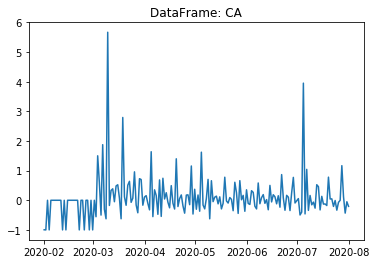

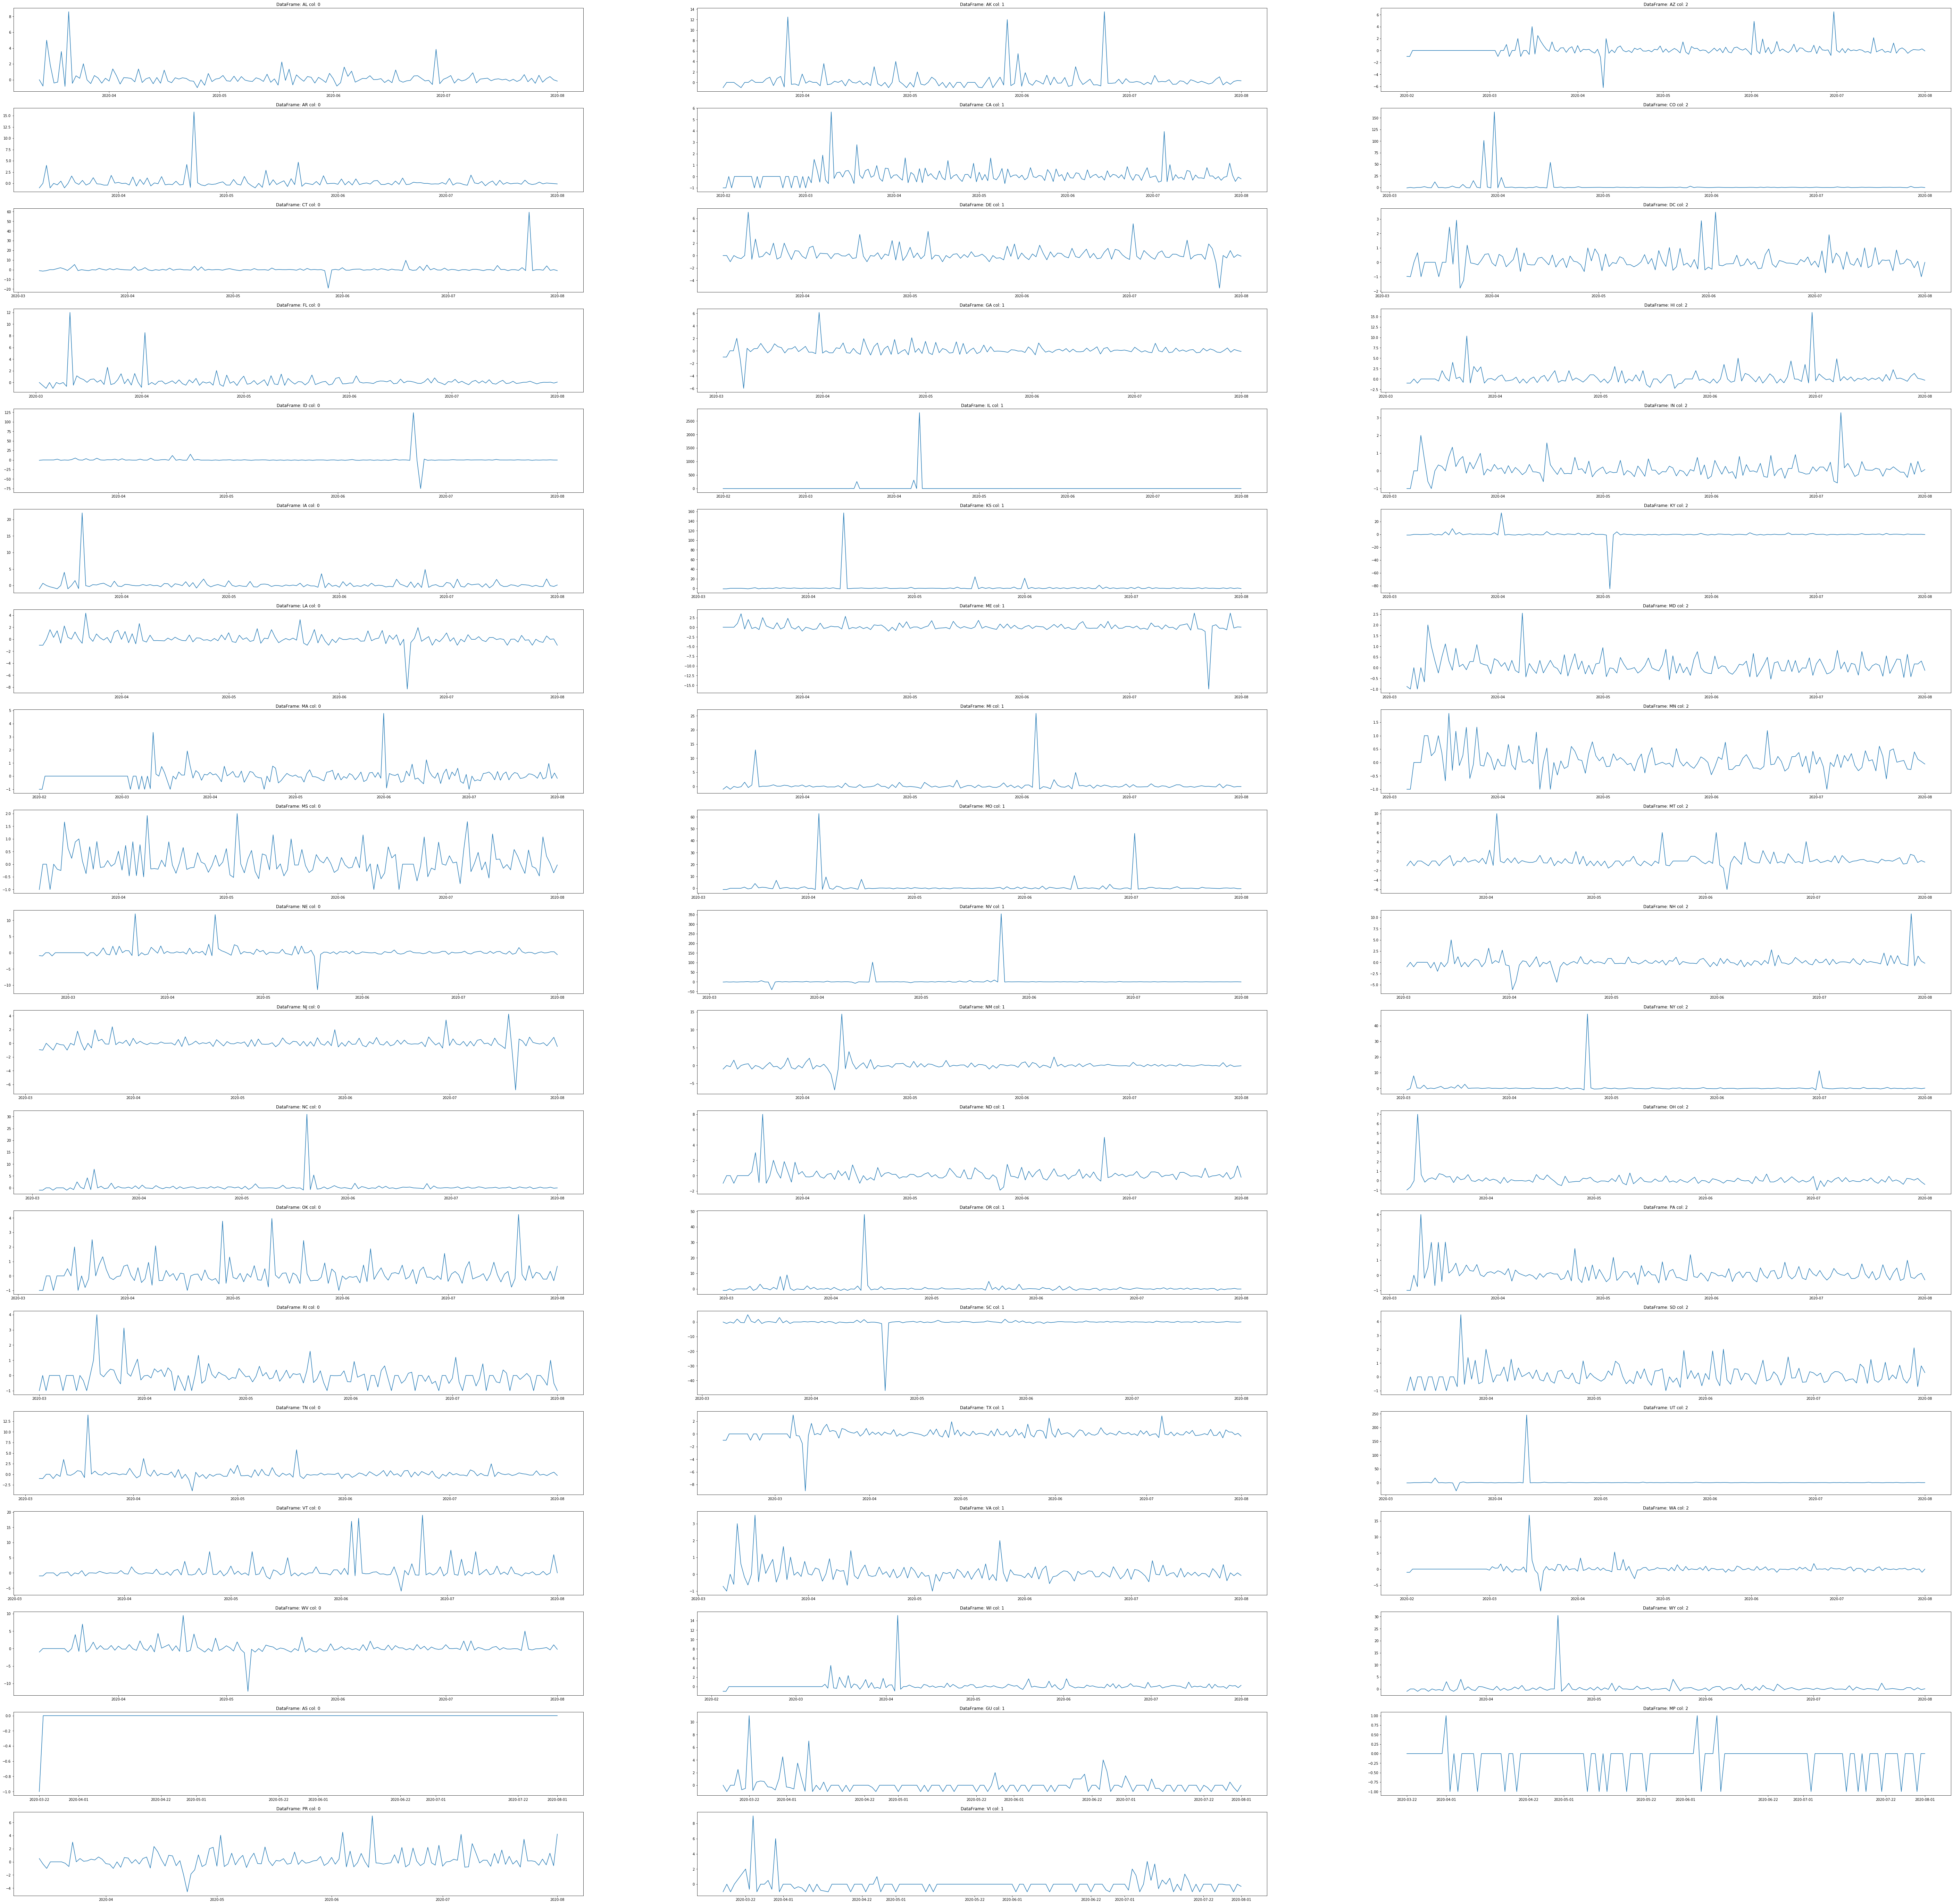

In [20]:
# Additional code used for data exploration
# Not used for prediction

# Plot graphs of change in New_Cases count

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import math
%matplotlib inline

def printNewCaseChangeForAllStates():
    # iterate through dictionary and plot
    col_nums = 3  # how many plots per row
    row_nums = math.ceil(len(us_states_fips_codes) / col_nums)  # how many rows of plots

    fig = plt.figure(figsize=(100, 100))

    gs = GridSpec(nrows=row_nums, ncols=col_nums)

    for i, (k, v) in enumerate(us_states_fips_codes.items(), 1):
        cur_row = int(i / col_nums)
        if (i % col_nums == 0):
            cur_col = 2
            cur_row = cur_row - 1
        else:
            cur_col = (i % col_nums) - 1

        ax = fig.add_subplot(gs[cur_row, cur_col])
        ax.plot(df_changes.loc[df_changes['FIPS']==v][['Date']], df_changes.loc[df_changes['FIPS']==v][['New_Cases']])

        ax.set_title(f'DataFrame: {k} col: {cur_col}')

def printNewCaseChangeForState(stateName):

    fips = us_states_fips_codes[stateName]
    plt.plot(df_changes.loc[df_changes['FIPS']==fips][['Date']], df_changes.loc[df_changes['FIPS']==fips][['New_Cases']])
    plt.title(f'DataFrame: {stateName}')

printNewCaseChangeForState("CA")
# To be actually able to see the individual graphs, save to a file and zoom in!
printNewCaseChangeForAllStates()